# Requirements

In [2]:
%pip install opencv-python
%pip install scikit-learn
%pip install matplotlib



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Imports


In [3]:
import cv2
import numpy as np 
from sklearn.cluster import KMeans,MeanShift 
from os.path import join
import matplotlib.pyplot as plt

In [4]:
# teste
PATH_1 = join('cropped', '503311001.bmp')
PATH_2 = join('masks', '503311001.bmp')




# Questão 1:
    Utilizando   a   base   de   imagens   “ultrassound.zip”   disponibilizada   no SIGAA, realize a segmentação das imagens das seguintes formas:

### I - Aplique o algoritmo K-means utilizando os pixels como pesos,após isso utilize algum detector de borda (à sua escolha); 

# Kmeans

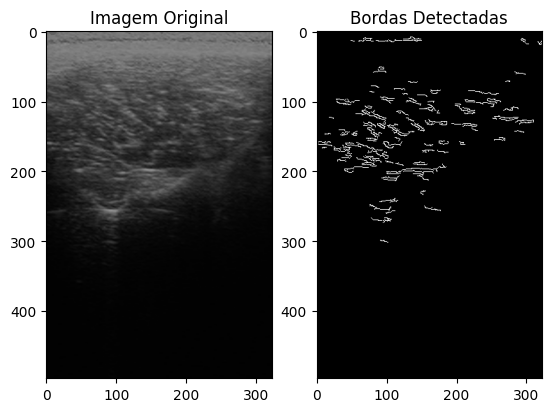

In [5]:
imagem = cv2.imread(PATH_1)
altura, largura = imagem.shape[:2]

# Convertendo a imagem para um array de pixels
pixels = imagem.reshape((imagem.shape[0] * imagem.shape[1], 3))


kmeans = KMeans(n_clusters=8, n_init=10)
kmeans.fit(pixels)

# Substituindo os pixels pelos valores dos centroides
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(imagem.shape)

# Convertendo para escala de cinza para aplicar o detector de bordas
gray_img = cv2.cvtColor(segmented_img.astype(np.uint8), cv2.COLOR_BGR2GRAY)

# Aplicando o detector de bordas Canny
edges = cv2.Canny(gray_img, 100, 200)

# Mostrando a imagem original e as bordas detectadas
plt.subplot(121), plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)), plt.title('Imagem Original')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Bordas Detectadas')

plt.show()


### II - Implemente   duas   segmentações   utilizando   os   algoritmos   debinarização   local   e  global  (Niblack   e  Otsu,   respectivamente),após   isso   utilize   dois   métodos   de   detecção   de   bordas   porgradiente

## o que é niblack e otsu?

### O método de binarização de Niblack é uma técnica de binarização local que leva em consideração a média e o desvio padrão dos valores dos pixels em uma região local da imagem.

O algoritmo de Niblack calcula um limiar local para cada pixel da imagem, determinando se o pixel pertence à região de primeiro plano ou de fundo. A fórmula básica do método Niblack é a seguinte:

##### Limiar Local = Média Local + k x Desvio Padrão Local
##### Média Local é a média dos valores dos pixels na vizinhança do pixel em questão.
##### Desvio Padrão Local** é o desvio padrão dos valores dos pixels na mesma vizinhança.
##### k é um parâmetro que pode ser ajustado para controlar a sensibilidade da binarização.

Se o valor do pixel é maior que o limiar local, ele é atribuído à região de primeiro plano (geralmente branco), caso contrário, é atribuído à região de fundo (geralmente preto).

Essa abordagem permite adaptar a binarização a diferentes condições de iluminação em áreas específicas da imagem.



## Otsu uma técnica de segmentação de imagem usada para binarizar uma imagem em duas classes (por exemplo, primeiro plano e fundo). O objetivo é encontrar um limiar ótimo que minimize a variabilidade intra-classe e maximize a variabilidade inter-classe.

Em termos simples, o método de Otsu calcula o limiar de tal forma que a variância ponderada dentro das duas classes seja minimizada. Ele realiza isso considerando as intensidades dos pixels como valores de intensidade de cinza.

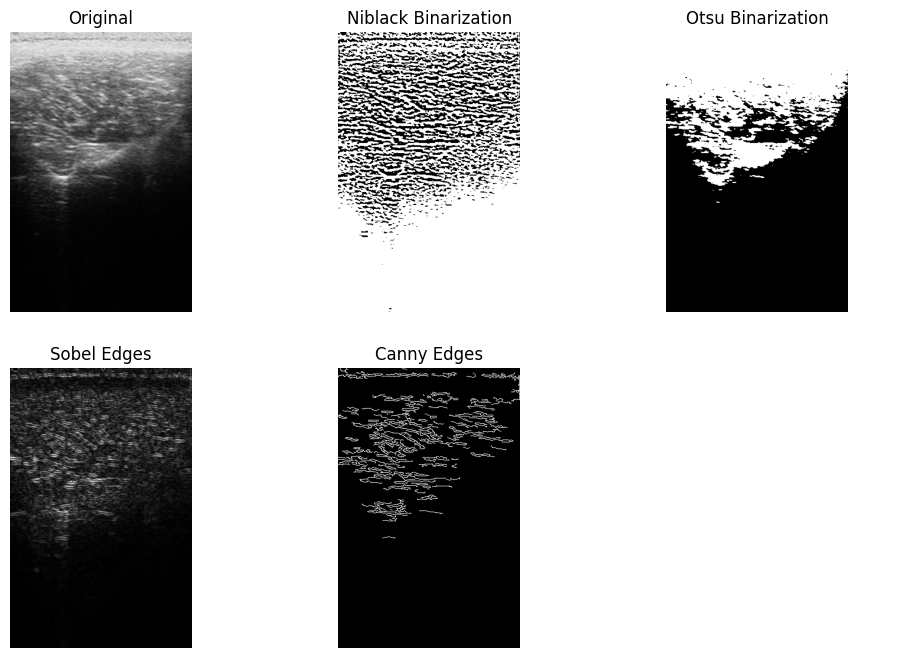

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread(PATH_1, cv2.IMREAD_GRAYSCALE)

# Binarização local usando Niblack
niblack_binary = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Binarização global usando Otsu
_, otsu_binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Detecção de bordas por gradiente usando Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

# Detecção de bordas por gradiente usando Canny
canny_edges = cv2.Canny(image, 50, 150)

# Configurar a exibição das imagens usando Matplotlib
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Exibir as imagens resultantes
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original')

axs[0, 1].imshow(niblack_binary, cmap='gray')
axs[0, 1].set_title('Niblack Binarization')

axs[0, 2].imshow(otsu_binary, cmap='gray')
axs[0, 2].set_title('Otsu Binarization')

axs[1, 0].imshow(sobel_edges, cmap='gray')
axs[1, 0].set_title('Sobel Edges')

axs[1, 1].imshow(canny_edges, cmap='gray')
axs[1, 1].set_title('Canny Edges')

# Remover ticks dos eixos para melhor visualização
for ax in axs.flat:
    ax.axis('off')

plt.show()


### III - Realize   a   detecção   de   bordas   utilizando   o   método   de   Marr-Hildreth. Explique quais as vantagens do método utilizado emrelação aos métodos baseados em gradiente

O método de Marr-Hildreth, também conhecido como detecção de bordas por zero-crossing do Laplaciano, é um método de detecção de bordas que envolve dois estágios principais: suavização e detecção de cruzamentos por zero. Vamos discutir brevemente os passos do método e destacar algumas vantagens em relação aos métodos baseados em gradiente.

### Método de Marr-Hildreth:

1. **Suavização:**
   - A imagem original é suavizada usando um filtro passa-baixa, geralmente o filtro Laplaciano de Gauss.
   - O filtro Laplaciano realça mudanças bruscas de intensidade na imagem, destacando bordas.

2. **Detecção de Cruzamentos por Zero:**
   - Os cruzamentos por zero são identificados no sinal resultante da suavização.
   - Onde o sinal muda de positivo para negativo (ou vice-versa), um cruzamento por zero é detectado.
   - Os pontos de cruzamento por zero correspondem aproximadamente às bordas da imagem.

### Vantagens do Método de Marr-Hildreth em Relação aos Métodos Baseados em Gradiente:

1. **Supressão de Ruído:**
   - A suavização inicial ajuda a suprimir o ruído presente na imagem. A aplicação do filtro Laplaciano de Gauss atua como uma filtragem passa-baixa, reduzindo a sensibilidade ao ruído.

2. **Detecção de Borda Precisa:**
   - O método de Marr-Hildreth tende a produzir bordas mais finas e precisas em comparação com alguns métodos baseados em gradiente. Isso ocorre porque o zero-crossing do Laplaciano ajuda a localizar o ponto exato de mudança de intensidade.

3. **Inibição de Resposta a Bordas Múltiplas:**
   - A detecção de cruzamentos por zero ajuda a evitar respostas múltiplas em uma única borda. Métodos baseados em gradiente podem produzir respostas múltiplas em uma única borda, especialmente quando a borda é espessa.

4. **Invariância à Orientação:**
   - O método de Marr-Hildreth é relativamente invariante à orientação da borda. Ele detecta bordas em várias direções, o que é útil em imagens onde as bordas podem ter orientações variadas.

5. **Ajuste de Parâmetros Simples:**
   - A suavização e a detecção de cruzamentos por zero geralmente têm parâmetros de ajuste simples, facilitando a escolha de valores adequados.

No entanto, vale ressaltar que a escolha entre métodos baseados em gradiente e métodos como o de Marr-Hildreth depende do contexto da aplicação e das características específicas da imagem. Em algumas situações, métodos baseados em gradiente podem ser mais apropriados, enquanto em outras, o método de Marr-Hildreth pode oferecer vantagens significativas.

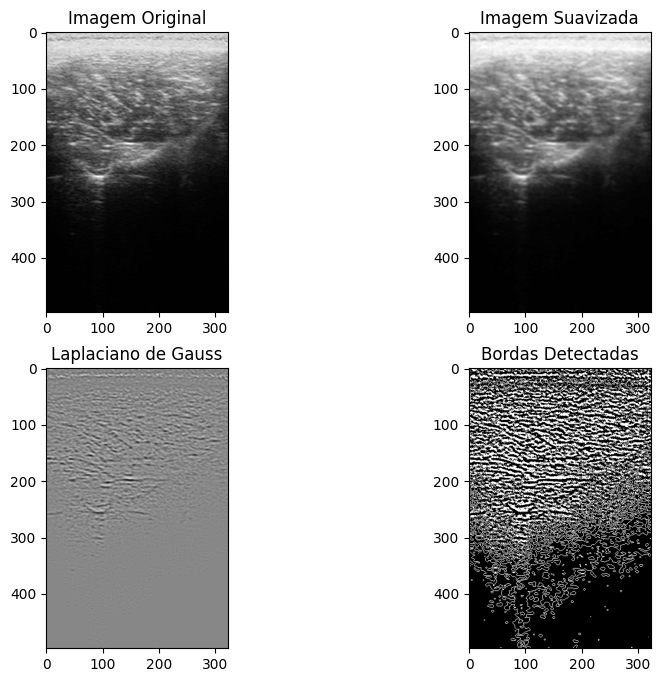

In [7]:
def marr_hildreth_edge_detection(image_path, sigma):
    # Leitura da imagem em escala de cinza
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Aplicação do filtro Laplaciano de Gauss
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

    # Encontrar cruzamentos por zero
    edges = np.zeros_like(laplacian)
    edges[laplacian > 0] = 255

    return image, blurred, laplacian, edges


# Parâmetro sigma para o filtro Laplaciano de Gauss
sigma = 1.4

# Detecção de bordas usando o método de Marr-Hildreth
original, blurred, laplacian, edges = marr_hildreth_edge_detection(PATH_1, sigma)

# Exibição das imagens
plt.figure(figsize=(10, 8))

plt.subplot(221), plt.imshow(original, cmap='gray'), plt.title('Imagem Original')
plt.subplot(222), plt.imshow(blurred, cmap='gray'), plt.title('Imagem Suavizada')
plt.subplot(223), plt.imshow(laplacian, cmap='gray'), plt.title('Laplaciano de Gauss')
plt.subplot(224), plt.imshow(edges, cmap='gray'), plt.title('Bordas Detectadas')

plt.show()


### IV - Aplique outro algoritmo de agrupamento que utilize também aposição espacial dos pixels como peso. Após isso, utilize algumdetector de borda (a sua escolha);

**o algoritmo de agrupamento Mini Batch K-Means**

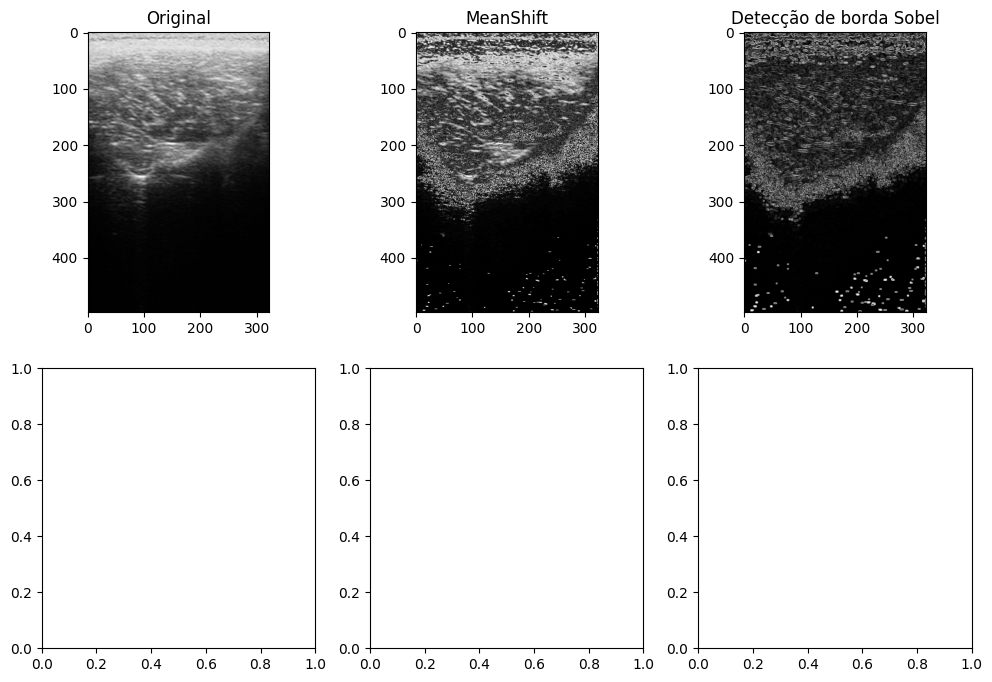

In [9]:
image = cv2.imread(PATH_1, cv2.IMREAD_GRAYSCALE)

mean_shift = MeanShift(bandwidth=0.5)
rotulos_mean_shift = mean_shift.fit_predict(image.reshape((-1, 1)))

# Exibir a imagem após Mean Shift
nova_imagem = rotulos_mean_shift.reshape(image.shape)

# Detector de Borda após Mean Shift,3
sobel_x_mean_shift = cv2.Sobel(rotulos_mean_shift.reshape(image.shape).astype(np.uint8), cv2.CV_64F, 1, 0, ksize=3)
sobel_y_mean_shift = cv2.Sobel(rotulos_mean_shift.reshape   (image.shape).astype(np.uint8), cv2.CV_64F, 0, 1, ksize=3)
bordas_mean_shift = np.sqrt(sobel_x_mean_shift**2 + sobel_y_mean_shift**2)


# Configurar a exibição das imagens usando Matplotlib
fig, axs = plt.subplots(1, 3, figsize=(12, 8))

# Exibir as imagens resultantes
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original')

axs[0, 1].imshow(nova_imagem, cmap='gray')
axs[0, 1].set_title('MeanShift')

axs[0, 2].imshow(bordas_mean_shift, cmap='gray')
axs[0, 2].set_title('Detecção de borda Sobel')

plt.show()

# 2) Crie   um   método   para   escolher   o  foreground  e   o  backgroundautomaticamente

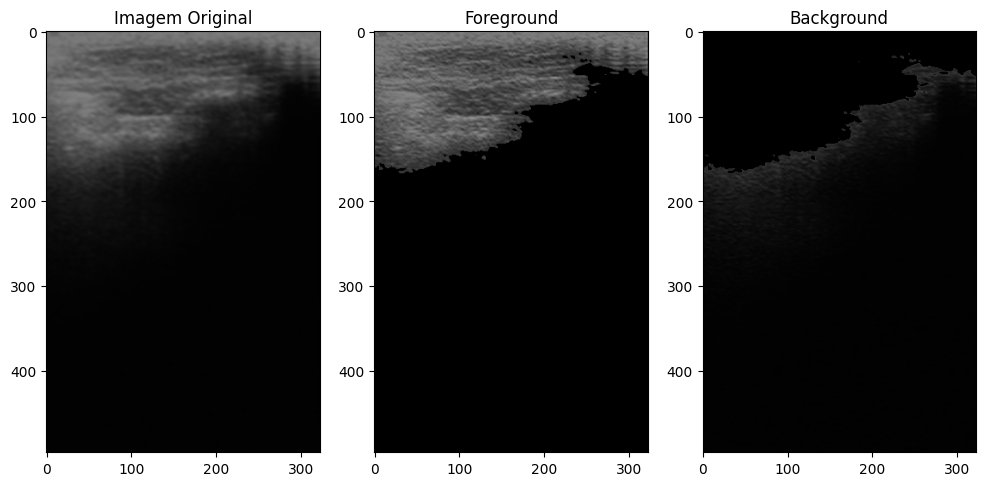

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def automatic_foreground_background_selection(image_path):


    image = cv2.imread(image_path)

    # Convertendo a imagem para RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    sigma = 1.4
    image_rgb = cv2.GaussianBlur(image, (0, 0), sigma)

    # Reshape dos pixels para aplicar K-means
    pixels = image_rgb.reshape((-1, 3))

    # Aplicando K-means para agrupar os pixels em 2 clusters (foreground e background)
    kmeans = KMeans(n_clusters=2, random_state=0,n_init=10)
    kmeans.fit(pixels)

    # Obtendo os rótulos dos clusters
    labels = kmeans.labels_

    # Escolhendo o cluster que representa o background
    background_cluster = np.argmax(np.bincount(labels))

    # Criando uma máscara para o background
    background_mask = (labels == background_cluster).reshape(image.shape[:2])

    # Invertendo a máscara para obter a máscara do foreground
    foreground_mask = ~background_mask

    # Aplicando a máscara na imagem original para obter o foreground e o background
    foreground = cv2.bitwise_and(image, image, mask=foreground_mask.astype(np.uint8))
    background = cv2.bitwise_and(image, image, mask=background_mask.astype(np.uint8))

    return image_rgb, foreground, background

# Caminho da imagem
image_path = PATH_1

# Obter o foreground e o background automaticamente
image, foreground, background = automatic_foreground_background_selection(image_path)

# Exibir as imagens
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(image), plt.title('Imagem Original')
plt.subplot(132), plt.imshow(foreground), plt.title('Foreground')
plt.subplot(133), plt.imshow(background), plt.title('Background')

plt.show()


# Usando escala de cinza

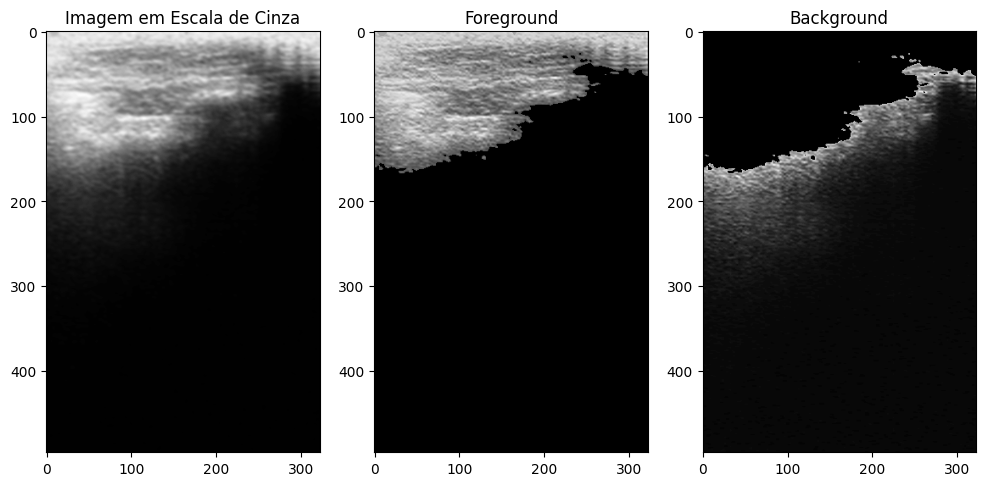

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def automatic_foreground_background_selection(image_path):
    # Leitura da imagem
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Aplicando desfoque gaussiano
    sigma = 1.4
    image_gray = cv2.GaussianBlur(image, (0, 0), sigma)

    # Reshape dos pixels para aplicar K-means
    pixels = image_gray.reshape((-1, 1))

    # Aplicando K-means para agrupar os pixels em 2 clusters (foreground e background)
    kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
    kmeans.fit(pixels)

    # Obtendo os rótulos dos clusters
    labels = kmeans.labels_

    # Escolhendo o cluster que representa o background
    background_cluster = np.argmax(np.bincount(labels))

    # Criando uma máscara para o background
    background_mask = (labels == background_cluster).reshape(image.shape[:2])

    # Invertendo a máscara para obter a máscara do foreground
    foreground_mask = ~background_mask

    # Aplicando a máscara na imagem original para obter o foreground e o background
    foreground = cv2.bitwise_and(image, image, mask=foreground_mask.astype(np.uint8))
    background = cv2.bitwise_and(image, image, mask=background_mask.astype(np.uint8))

    return image_gray, foreground, background

# Caminho da imagem
image_path = PATH_1

# Obter o foreground e o background automaticamente
image, foreground, background = automatic_foreground_background_selection(image_path)

# Exibir as imagens
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Imagem em Escala de Cinza')
plt.subplot(132), plt.imshow(foreground, cmap='gray'), plt.title('Foreground')
plt.subplot(133), plt.imshow(background, cmap='gray'), plt.title('Background')

plt.show()


# 3 - Metricas Escolhidas: 
    interseção sobre União (Intersection over Union, IoU) em tarefas de segmentação de imagem. A IoU é uma métrica que avalia a sobreposição entre a máscara segmentada predita e a máscara segmentada verdadeira.
    
    também conhecido como F1-score ou Índice de Sørensen-Dice. Essa métrica é frequentemente usada em tarefas de segmentação de imagem e avalia a sobreposição entre a máscara segmentada predita e a máscara segmentada verdadeira.

    Ambas as métricas produzem valores entre 0 e 1, onde 0 indica nenhuma sobreposição (nenhuma correspondência entre as máscaras) e 1 indica uma sobreposição completa (máscaras idênticas). Em termos práticos, IoU e Dice são frequentemente utilizados de forma intercambiável, pois são proporcionalmente relacionados: quando IoU aumenta, Dice também aumenta.

    As diferenças nos resultados podem ser interpretadas considerando a sensibilidade específica de cada métrica. O IoU é mais sensível a áreas maiores de sobreposição, enquanto o Dice penaliza mais fortemente falsos positivos/negativos e é mais sensível a pequenas sobreposições.

    É importante levar em conta o contexto específico do problema ao interpretar esses resultados. Se você estiver buscando uma métrica que dê mais peso à sobreposição de áreas maiores, um IoU de 56% pode ser considerado razoável. Por outro lado, um Coeficiente de Dice de 0.5% indica uma sobreposição relativamente baixa, o que pode ser uma área de melhoria, especialmente se a tarefa exige uma precisão mais fina.



In [ ]:
def calculate_iou(true_mask, pred_mask):
    intersection = np.logical_and(true_mask, pred_mask)
    union = np.logical_or(true_mask, pred_mask)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

def calculate_dice_coefficient(true_mask, pred_mask):
    intersection = np.sum(true_mask * pred_mask)
    dice_coefficient = (2.0 * intersection) / (np.sum(true_mask) + np.sum(pred_mask))
    return dice_coefficient



In [ ]:
image = cv2.imread(PATH_1, cv2.IMREAD_GRAYSCALE)

_, otsu_binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


true_mask = cv2.imread(PATH_2, cv2.IMREAD_GRAYSCALE)

# Certifique-se de que as dimensões são iguais (se necessário, redimensione)
true_mask = cv2.resize(true_mask, (otsu_binary.shape[1], otsu_binary.shape[0]))

# Converta para 0 ou 255 (binário)
true_mask = cv2.threshold(true_mask, 127, 255, cv2.THRESH_BINARY)[1]

# Calcular IoU
iou_score = calculate_iou(true_mask, otsu_binary)
dice_score = calculate_dice_coefficient(true_mask,otsu_binary)

print("IoU Score:", iou_score)
print("Dice Score:", dice_score)


IoU Score: 0.5611520758609011
Dice Score: 0.002819195400565417
